In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 16
epochs = 10
hidden_size = 64

In [3]:
iris = datasets.load_iris()
X = iris.data.astype("float32")  # форма (150, 4)
y = iris.target.astype("int64")  # форма (150,)

In [4]:
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)
dataset = TensorDataset(X_tensor, y_tensor)

# Разбиение на train/test 80/20
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
model = nn.Sequential(
    nn.Linear(4, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 3)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracies = []
test_accuracies = []

Epoch 1: Train Acc = 0.3750, Test Acc = 0.2667
Epoch 2: Train Acc = 0.3500, Test Acc = 0.2667
Epoch 3: Train Acc = 0.3500, Test Acc = 0.3000
Epoch 4: Train Acc = 0.6250, Test Acc = 0.5667
Epoch 5: Train Acc = 0.6917, Test Acc = 0.6000
Epoch 6: Train Acc = 0.6917, Test Acc = 0.6000
Epoch 7: Train Acc = 0.7000, Test Acc = 0.6000
Epoch 8: Train Acc = 0.6917, Test Acc = 0.5667
Epoch 9: Train Acc = 0.7000, Test Acc = 0.6667
Epoch 10: Train Acc = 0.7667, Test Acc = 0.8000


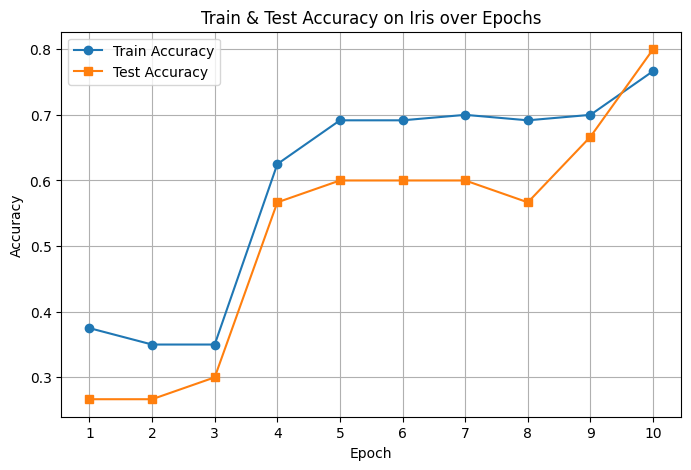

In [6]:
for epoch in range(1, epochs + 1):
    # Обучение
    model.train()
    correct_train = 0
    total_train = 0
    for features, labels in train_loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (preds == labels).sum().item()

    train_acc = correct_train / total_train
    train_accuracies.append(train_acc)

    # Тестирование
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (preds == labels).sum().item()

    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

# Cell 8: Построение графика точности
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_accuracies, marker='o', label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, marker='s', label='Test Accuracy')
plt.title('Train & Test Accuracy on Iris over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs + 1))
plt.legend()
plt.grid(True)
plt.show()
